# Comparando SVM e Random Forest em Dataset Complexo

Neste notebook, vamos comparar o desempenho dos algoritmos SVM e Random Forest no conjunto de dados `make_moons`, que apresenta uma distribuição não linear e mais complexa.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib.colors import ListedColormap


In [2]:
# Gerar dados não lineares (moons)
X, y = make_moons(n_samples=500, noise=0.3)

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [3]:
# Pipeline SVM com kernel RBF
svm_model = SVC(kernel='rbf', C=1.0)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("🔍 SVM - Resultados")
print("Acurácia:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


🔍 SVM - Resultados
Acurácia: 0.8866666666666667
              precision    recall  f1-score   support

           0       0.89      0.90      0.89        79
           1       0.89      0.87      0.88        71

    accuracy                           0.89       150
   macro avg       0.89      0.89      0.89       150
weighted avg       0.89      0.89      0.89       150



In [4]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("🌳 Random Forest - Resultados")
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


🌳 Random Forest - Resultados
Acurácia: 0.8733333333333333
              precision    recall  f1-score   support

           0       0.88      0.87      0.88        79
           1       0.86      0.87      0.87        71

    accuracy                           0.87       150
   macro avg       0.87      0.87      0.87       150
weighted avg       0.87      0.87      0.87       150



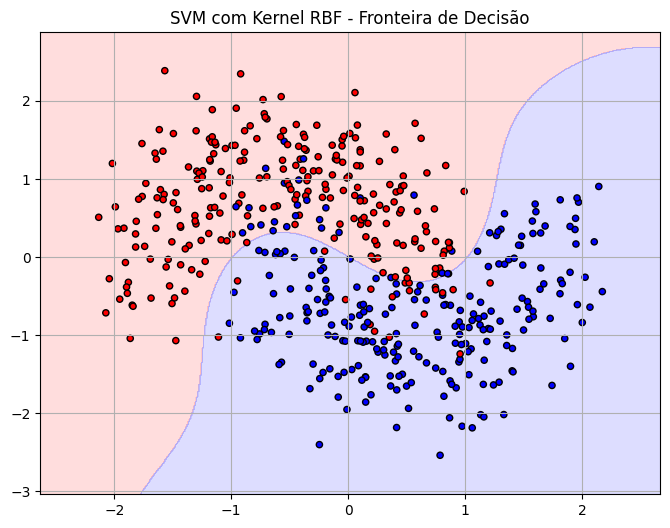

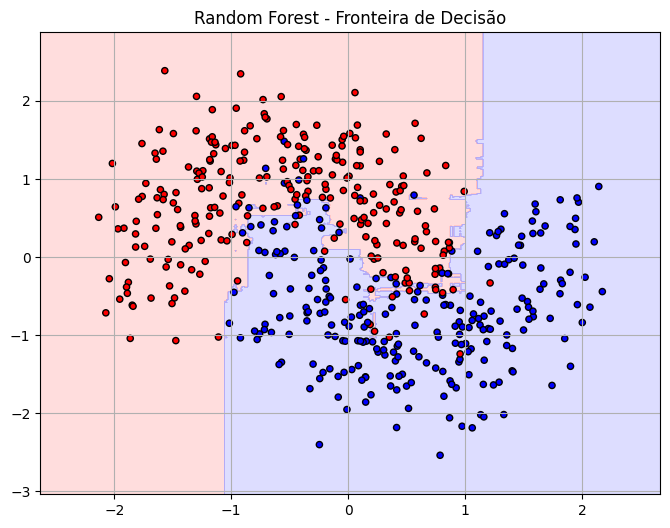

In [5]:
def plot_decision_boundary(model, X, y, title):
    X = StandardScaler().fit_transform(X)
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.title(title)
    plt.grid(True)
    plt.show()

# Reajustar os modelos em todo o conjunto padronizado para visualização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
svm_model_vis = SVC(kernel='rbf', C=1.0).fit(X_scaled, y)
rf_model_vis = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_scaled, y)

plot_decision_boundary(svm_model_vis, X, y, "SVM com Kernel RBF - Fronteira de Decisão")
plot_decision_boundary(rf_model_vis, X, y, "Random Forest - Fronteira de Decisão")
